In [1013]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1014]:
train_data = pd.read_csv('/content/drive/MyDrive/Kaggle competition datasets/train(1).csv')
test_data = pd.read_csv('/content/drive/MyDrive/Kaggle competition datasets/test(1).csv')

In [1015]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1016]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [1017]:
train_data.shape

(8693, 14)

In [1018]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [1019]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [1020]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [1021]:
from sklearn.impute import SimpleImputer

object_null_values =['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

sio = SimpleImputer(strategy = 'most_frequent')

train_data['HomePlanet'] = sio.fit_transform(train_data[['HomePlanet']])
train_data['CryoSleep'] = sio.fit_transform(train_data[['CryoSleep']])
train_data['Cabin'] = sio.fit_transform(train_data[['Cabin']])
train_data['Destination'] = sio.fit_transform(train_data[['Destination']])
train_data['VIP'] = sio.fit_transform(train_data[['VIP']])

test_data['HomePlanet'] = sio.fit_transform(test_data[['HomePlanet']])
test_data['CryoSleep'] = sio.fit_transform(test_data[['CryoSleep']])
test_data['Cabin'] = sio.fit_transform(test_data[['Cabin']])
test_data['Destination'] = sio.fit_transform(test_data[['Destination']])
test_data['VIP'] = sio.fit_transform(test_data[['VIP']])

In [1022]:
si = SimpleImputer(strategy = 'mean')
train_data['Age'] = sio.fit_transform(train_data[['Age']])
train_data['RoomService'] = sio.fit_transform(train_data[['RoomService']])
train_data['FoodCourt'] = sio.fit_transform(train_data[['FoodCourt']])
train_data['ShoppingMall'] = sio.fit_transform(train_data[['ShoppingMall']])
train_data['Spa'] = sio.fit_transform(train_data[['Spa']])
train_data['VRDeck'] = sio.fit_transform(train_data[['VRDeck']])

test_data['Age'] = sio.fit_transform(test_data[['Age']])
test_data['RoomService'] = sio.fit_transform(test_data[['RoomService']])
test_data['FoodCourt'] = sio.fit_transform(test_data[['FoodCourt']])
test_data['ShoppingMall'] = sio.fit_transform(test_data[['ShoppingMall']])
test_data['Spa'] = sio.fit_transform(test_data[['Spa']])
test_data['VRDeck'] = sio.fit_transform(test_data[['VRDeck']])


In [1023]:
train_data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [1024]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **Analyse number of persons on Home planet**

In [1025]:
train_data['HomePlanet'].value_counts()

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

([<matplotlib.patches.Wedge at 0x7c1efe3d6080>,
 [Text(-0.18065168624423047, 1.085064499583834, 'Earth'),
  Text(-0.4988757573000686, -0.9803687973300064, 'Europa'),
  Text(0.8851278775740179, -0.6531069134079922, 'Mars')],
 [Text(-0.09853728340594388, 0.591853363409364, '55.251354%'),
  Text(-0.27211404943640105, -0.534746616725458, '24.513976%'),
  Text(0.48279702413128245, -0.35624013458617754, '20.234671%')])

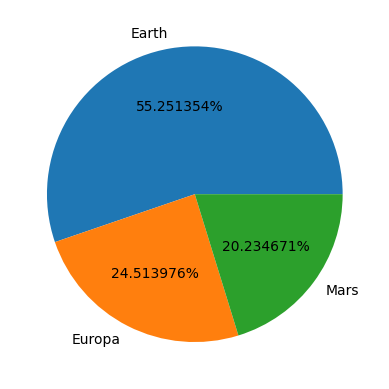

In [1026]:
labels = ['Earth' , 'Europa' , 'Mars']

home_planet_counts = train_data['HomePlanet'].value_counts()

plt.pie(home_planet_counts , labels=labels , autopct = '%2f%%')

0 : Not Transported
1 : Transported


<Axes: xlabel='HomePlanet', ylabel='count'>

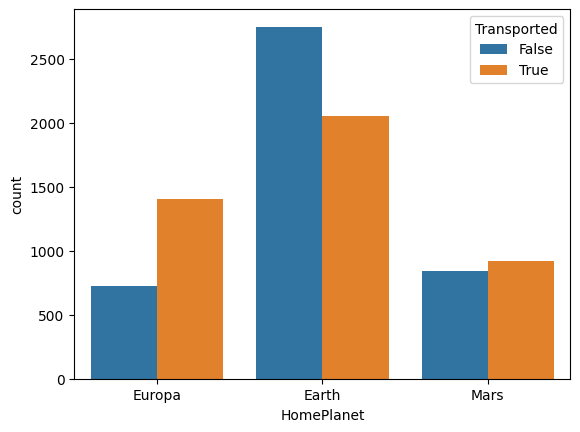

In [1027]:
print('0 : Not Transported')
print('1 : Transported')
sns.countplot(data=train_data, x = train_data['HomePlanet'] , hue = train_data['Transported'] , legend='auto')

In [1028]:
People_with_the_earth_planet = train_data.loc[train_data.HomePlanet == 'Earth']['Transported']
percentage_People_with_the_earth_planet = (sum(People_with_the_earth_planet) / len(People_with_the_earth_planet) * 100)
percentage_People_with_the_earth_planet

42.764938580054135

In [1029]:
People_with_the_europa_planet = train_data.loc[train_data.HomePlanet == 'Europa']['Transported']
percentage_People_with_the_europa_planet = (sum(People_with_the_europa_planet) / len(People_with_the_europa_planet) * 100)
percentage_People_with_the_europa_planet

65.884561238855

In [1030]:
People_with_the_mars_planet = train_data.loc[train_data.HomePlanet == 'Mars']['Transported']
percentage_People_with_the_mars_planet = (sum(People_with_the_mars_planet) / len(People_with_the_mars_planet) * 100)
percentage_People_with_the_mars_planet

52.30244457077885

In [1031]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in train_data.columns:
    if train_data[column].dtype == 'object' :
        train_data[column] = label_encoder.fit_transform(train_data[column])

train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,False
1,1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,True
2,2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,False
3,3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,False
4,4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,True


In [1032]:
test_data1 = test_data[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP' , 'Age' ,	'RoomService' ,	'FoodCourt' ,	'ShoppingMall' ,	'Spa' ,	'VRDeck']]

In [1033]:
label_encoder = LabelEncoder()

for column in test_data1.columns:
    if test_data1[column].dtype == 'object' :
        test_data1[column] = label_encoder.fit_transform(test_data[column])

test_data1.head()

<ipython-input-1033-60e93c270696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[column] = label_encoder.fit_transform(test_data[column])
<ipython-input-1033-60e93c270696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1[column] = label_encoder.fit_transform(test_data[column])
<ipython-input-1033-60e93c270696>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2784,2,0,27.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1867,2,0,19.0,0.0,9.0,0.0,2823.0,0.0
2,1,1,257,0,0,31.0,0.0,0.0,0.0,0.0,0.0
3,1,0,259,2,0,38.0,0.0,6652.0,0.0,181.0,585.0
4,0,0,1940,2,0,20.0,10.0,0.0,635.0,0.0,0.0


In [1034]:
x_label_train = train_data[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP' , 'Age' ,	'RoomService' ,	'FoodCourt' ,	'ShoppingMall' ,	'Spa' ,	'VRDeck']]
x_test_test = test_data1[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP' , 'Age' ,	'RoomService' ,	'FoodCourt' ,	'ShoppingMall' ,	'Spa' ,	'VRDeck']]

In [1035]:
y_train = train_data['Transported']
y_train

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

In [1036]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled_minmax_train = scaler.fit_transform(x_label_train)
x_scaled_minmax_test = scaler.fit_transform(x_test_test)

In [1037]:
from sklearn.model_selection import train_test_split

x_train_split , x_test_split , y_train_split , y_test_split = train_test_split(x_scaled_minmax_train , y_train , test_size = 0.2 , random_state = 42)

In [1038]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
lgbm = LGBMClassifier(num_leaves=50, min_data_in_leaf=10, max_depth=6, learning_rate=0.1, num_iterations=50, feature_fraction=0.5, bagging_fraction=0.05, lambda_l1=0.1, lambda_l2=0.2, max_bin=255)
lgbm.fit(x_train_split , y_train_split)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.05, subsample=1.0 will be ignored. Current value: bagging_fraction=0.05
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Curr

LGBMClassifier(bagging_fraction=0.05, feature_fraction=0.5, lambda_l1=0.1,
               lambda_l2=0.2, max_bin=255, max_depth=6, min_data_in_leaf=10,
               num_iterations=50, num_leaves=50)

In [1039]:
y_pred_lgbm = lgbm.predict(x_test_split)
y_pred_lgbm

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.05, subsample=1.0 will be ignored. Current value: bagging_fraction=0.05


array([False,  True,  True, ..., False,  True, False])

In [1040]:
accuracy_score(y_test_split , y_pred_lgbm)

0.8004600345025877

In [1041]:
y_pred_lgbm_original_test_data = lgbm.predict(x_test_test)
y_pred_lgbm_original_test_data

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] lambda_l2 is set=0.2, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.05, subsample=1.0 will be ignored. Current value: bagging_fraction=0.05


array([ True, False,  True, ...,  True, False,  True])

In [1042]:
result = pd.DataFrame({
    'PassengerId': test_data.PassengerId,
    'Transported': y_pred_lgbm_original_test_data
    })
result.to_csv('submission.csv', index=False)
print("Successfully Saved")

Successfully Saved
